In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   expenses  1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,expenses
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.665471,1.094918,13270.422414
std,14.049960,6.098382,1.205493,12110.011240
min,18.000000,16.000000,0.000000,1121.870000
25%,27.000000,26.300000,0.000000,4740.287500
50%,39.000000,30.400000,1.000000,9382.030000
75%,51.000000,34.700000,2.000000,16639.915000
max,64.000000,53.100000,5.000000,63770.430000


In [5]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [6]:
data.duplicated().sum()

np.int64(1)

In [7]:
data[data.duplicated()]

,age,sex,bmi,children,smoker,region,expenses
581,19,male,30.6,0,no,northwest,1639.56


In [8]:
data.drop_duplicates(inplace=True)

In [9]:
num_cols = data.select_dtypes(include='number').columns.tolist()
cat_cols = data.select_dtypes(exclude='number').columns.tolist()

num_cols, cat_cols

(['age', 'bmi', 'children', 'expenses'], ['sex', 'smoker', 'region'])

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'expenses'}>]], dtype=object)

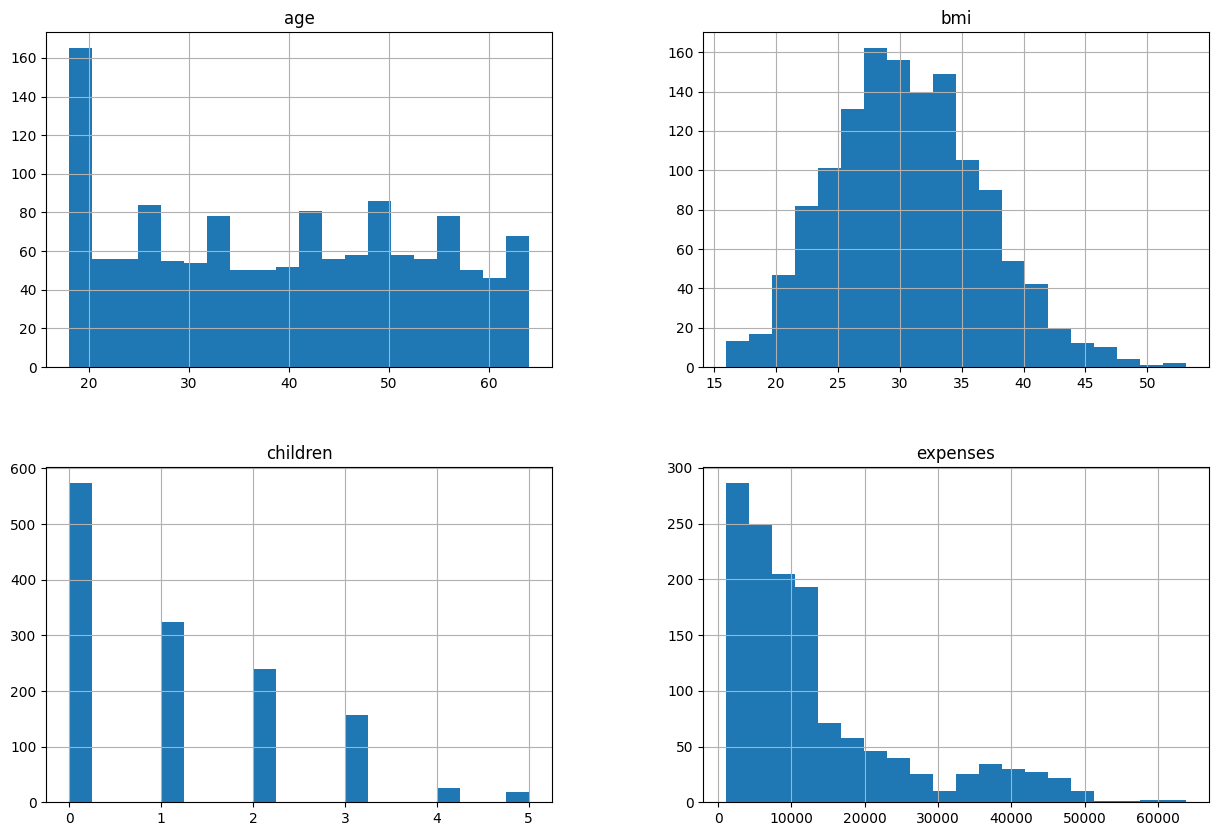

In [11]:
data[num_cols].hist(bins=20, figsize=(15,10))

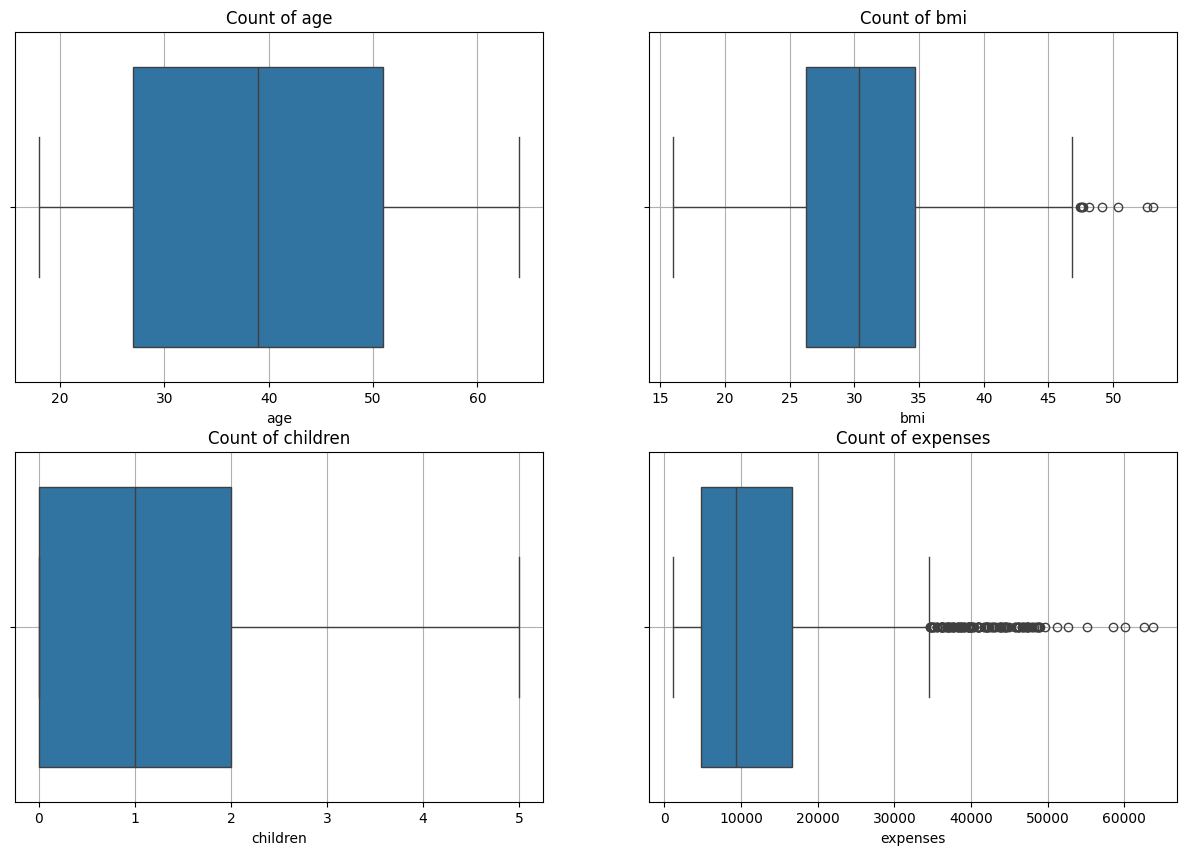

In [15]:
plt.figure(figsize=(15,10))

for i, col in enumerate(num_cols):
    plt.subplot(2,2,i+1)
    sns.boxplot(data=data, x=col)
    plt.xlabel(col)
    plt.grid(True)
    plt.title(f'Count of {col}')
plt.show()

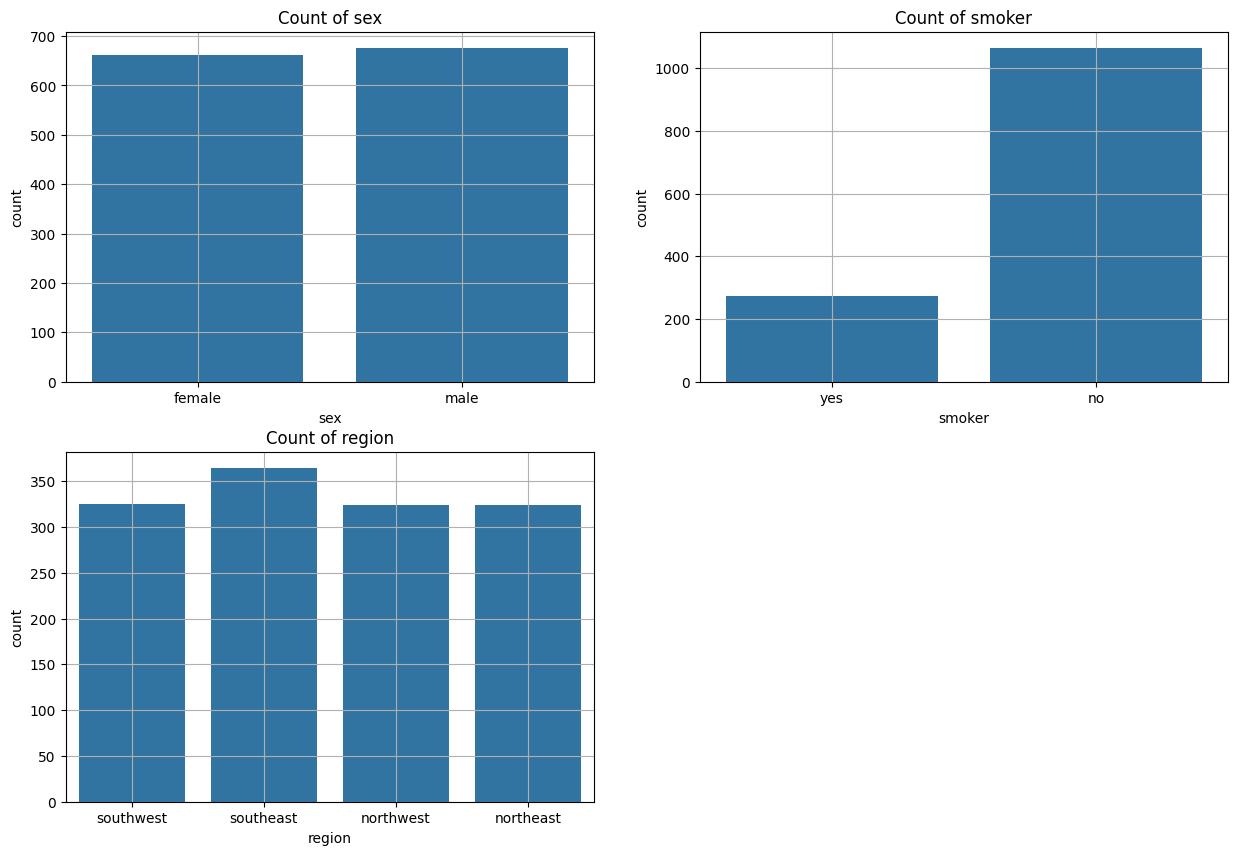

In [13]:
plt.figure(figsize=(15,10))

for i, col in enumerate(cat_cols):
    plt.subplot(2,2,i+1)
    sns.countplot(data=data, x=col)
    plt.xlabel(col)
    plt.grid(True)
    plt.title(f'Count of {col}')
plt.show()

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

data[num_cols] = scaler.fit_transform(data[num_cols])

In [17]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()

for col in cat_cols:
    data[col] = encoder.fit_transform(data[col])

In [18]:
data

,age,sex,bmi,children,smoker,region,expenses
0,-1.440418,0,-0.453484,-0.909234,1,3,0.297856
1,-1.511647,1,0.513986,-0.079442,0,2,-0.954381
2,-0.799350,1,0.382803,1.580143,0,2,-0.729373
3,-0.443201,1,-1.306169,-0.909234,0,1,0.719104
4,-0.514431,1,-0.289506,-0.909234,0,1,-0.777498
...,...,...,...,...,...,...,...
1333,0.767704,1,0.054847,1.580143,0,1,-0.221263
1334,-1.511647,0,0.202427,-0.909234,0,0,-0.914695
1335,-1.511647,0,1.022317,-0.909234,0,2,-0.962288
1336,-1.297958,0,-0.797838,-0.909234,0,3,-0.931053


In [19]:
X = data.drop(columns=['expenses'])
y = data['expenses']

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [21]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error, root_mean_squared_error, r2_score

In [22]:
models = {
    'name': [],
	'model': [],
    'pred': [],
    'mae': [],
    'mape': [],
    'mse': [],
    'rmse': [],
    'r2': []
}
i=0

In [23]:
models['model'].append(LinearRegression())
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('Linear Regression')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

Linear Regression:
MAE: 0.34550510860273126
MAPE: 1.1905310974365413
MSE: 0.26567070011352567
R2: 0.772470438382168


In [24]:
models['model'].append(Lasso(alpha=1.0, max_iter=2000))
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('Lasso Regression')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

Lasso Regression:
MAE: 0.7784396025439828
MAPE: 0.9874935896109098
MSE: 1.172127296248828
R2: -0.0038502919660607926


In [25]:
models['model'].append(Ridge(alpha=1.0, max_iter=2000))
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('Ridge Regression')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

Ridge Regression:
MAE: 0.3466930933932441
MAPE: 1.1895766713234108
MSE: 0.26678336721899315
R2: 0.771517511850844


In [26]:
models['model'].append(ElasticNet(alpha=1.0, max_iter=2000))
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('ElasticNet Regression')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

ElasticNet Regression:
MAE: 0.7784396025439828
MAPE: 0.9874935896109098
MSE: 1.172127296248828
R2: -0.0038502919660607926


In [27]:
models['model'].append(SVR(kernel='rbf', C=1.0))
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('SVR')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

SVR:
MAE: 0.23017557834997435
MAPE: 0.7252679606259143
MSE: 0.19206077448030062
R2: 0.8355125205647046


In [28]:
models['model'].append(RandomForestRegressor(
        random_state=42,
        n_estimators=100,
        min_samples_split=10,
        min_samples_leaf=2,
        max_features='sqrt',
        max_depth=6,
        oob_score=True
    ))
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('Random Forest Regressor')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

Random Forest Regressor:
MAE: 0.27972219763123596
MAPE: 0.6227535902112586
MSE: 0.18533070820052525
R2: 0.8412763817268195


In [29]:
models['model'].append(GradientBoostingRegressor(
    random_state=42,
    n_estimators=400,
    min_samples_split=10,
    min_samples_leaf=4,
    max_features='sqrt',
    max_depth=3,
    learning_rate=0.01,
    subsample=0.8
))
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('Gradient Boosting')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

Gradient Boosting:
MAE: 0.2540448178516111
MAPE: 0.64593376037129
MSE: 0.1696756232574002
R2: 0.8546839370676119


In [30]:
models['model'].append(KNeighborsRegressor())
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('K Neighbors Regressor')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

K Neighbors Regressor:
MAE: 0.34918493033891784
MAPE: 1.0448222945195997
MSE: 0.3823298930142396
R2: 0.672559477150662


In [31]:
models['model'].append(DecisionTreeRegressor())
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('Decision Tree Regressor')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

Decision Tree Regressor:
MAE: 0.23602145622767223
MAPE: 0.8619144388755642
MSE: 0.26609209946818924
R2: 0.7721095374232303


In [32]:
models['model'].append(XGBRegressor(
    random_state=42,
    objective='reg:squarederror',
    subsample=1.0,
    reg_lambda=1,
    reg_alpha=0.1,
    n_estimators=200,
    min_child_weight=1,
    max_depth=4,
    learning_rate=0.01,
    gamma=0.1,
    colsample_bytree=0.8
))
models['model'][i].fit(X_train,y_train)
models['pred'].append(models['model'][i].predict(X_test))

models['name'].append('XGB Regressor')
models['mae'].append(mean_absolute_error(y_test,models['pred'][i]))
models['mape'].append(mean_absolute_percentage_error(y_test,models['pred'][i]))
models['mse'].append(mean_squared_error(y_test,models['pred'][i]))
models['rmse'].append(root_mean_squared_error(y_test,models['pred'][i]))
models['r2'].append(r2_score(y_test,models['pred'][i]))

print(f"{models['name'][i]}:")
print("MAE:",models['mae'][i])
print("MAPE:",models['mape'][i])
print("MSE:",models['mse'][i])
print("R2:",models['r2'][i])
i+=1

XGB Regressor:
MAE: 0.36159738541172226
MAPE: 0.7995156639058077
MSE: 0.26577722978409934
R2: 0.7723792026936462


In [33]:
results = pd.DataFrame({
    'name': models['name'],
    'mae': models['mae'],
    'mape': models['mape'],
    'mse': models['mse'],
    'rsme': models['rmse'],
    'r2': models['r2']
})

results

,name,mae,mape,mse,rsme,r2
0,Linear Regression,0.345505,1.190531,0.265671,0.515433,0.772470
1,Lasso Regression,0.778440,0.987494,1.172127,1.082648,-0.003850
2,Ridge Regression,0.346693,1.189577,0.266783,0.516511,0.771518
3,ElasticNet Regression,0.778440,0.987494,1.172127,1.082648,-0.003850
4,SVR,0.230176,0.725268,0.192061,0.438247,0.835513
5,Random Forest Regressor,0.279722,0.622754,0.185331,0.430501,0.841276
6,Gradient Boosting,0.254045,0.645934,0.169676,0.411917,0.854684
7,K Neighbors Regressor,0.349185,1.044822,0.382330,0.618328,0.672559
8,Decision Tree Regressor,0.236021,0.861914,0.266092,0.515841,0.772110
9,XGB Regressor,0.361597,0.799516,0.265777,0.515536,0.772379
